In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/NetflixMoviesandTVShows/netflix_titles.csv", index_col = 'show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape

(7787, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [5]:
df.describe(include=[np.object])

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,14,216,492,7769
top,Movie,Upin & Ipin,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,5377,1,18,18,2555,118,2863,1608,334,3


<AxesSubplot:>

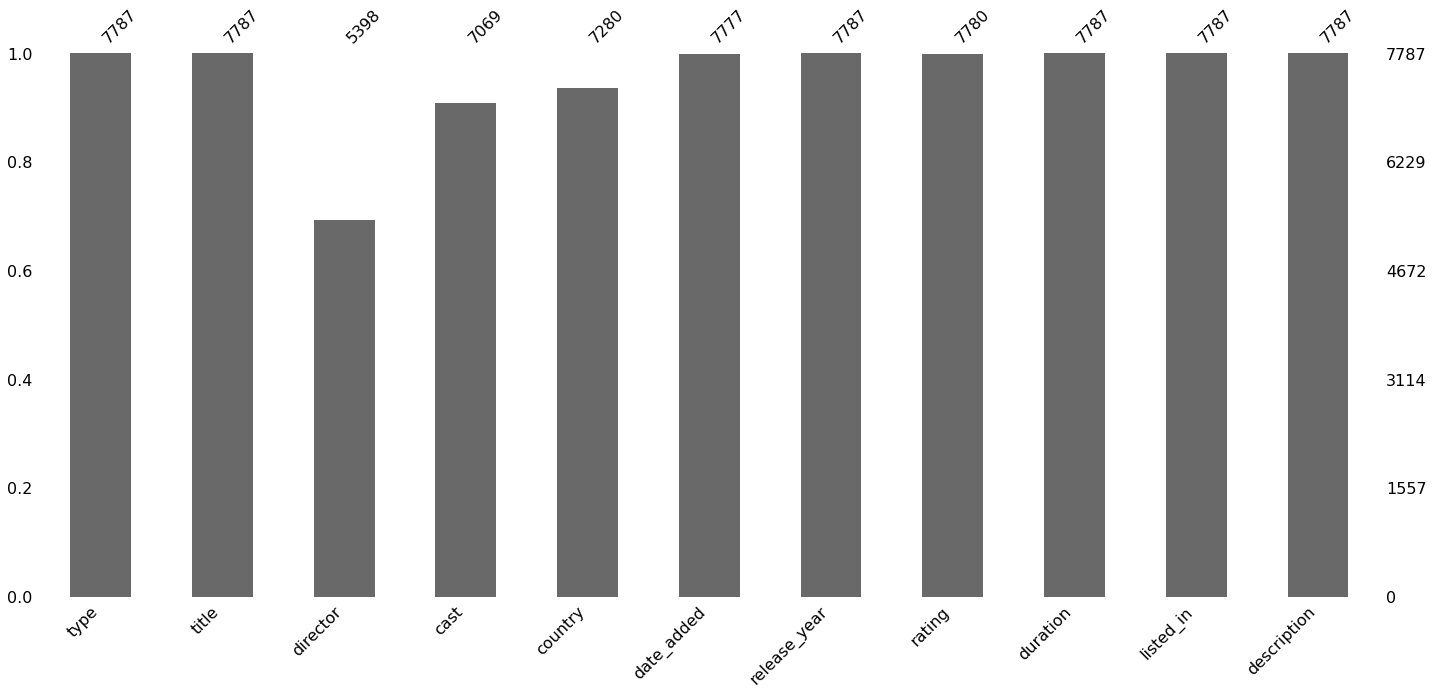

In [6]:
msno.bar(df)

In [7]:
dup = df.duplicated()
df[dup].sum()

type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [8]:
df.dropna(subset = ['date_added'], inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
result = df['type'].value_counts()
result

Movie      5377
TV Show    2400
Name: type, dtype: int64

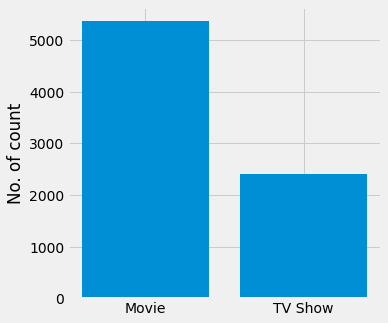

In [10]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (5,5))
plt.bar(result.index, result.values)
plt.ylabel("No. of count")
plt.show()

In [11]:
result = df['director'].value_counts()[0:10].sort_values()
result

Johnnie To                 8
David Dhawan               9
Steven Spielberg          10
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Cathy Garcia-Molina       13
Jay Karas                 14
Marcus Raboy              16
Raúl Campos, Jan Suter    18
Name: director, dtype: int64

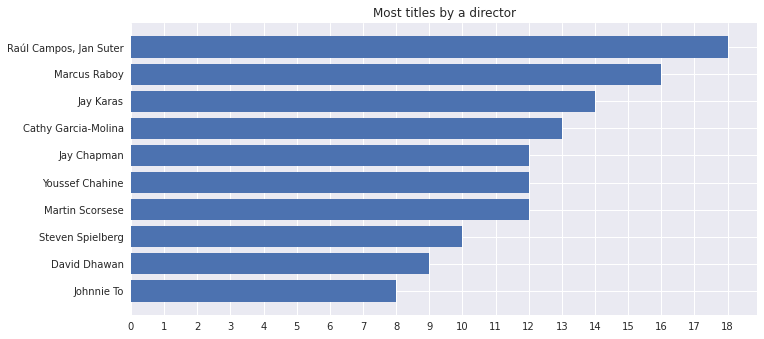

In [12]:
plt.style.use("seaborn")
plt.figure(figsize = (10,5))
plt.barh(result.index[:10],result.values[:10])
plt.title("Most titles by a director")
plt.xticks(list(range(0,19)))
plt.show()

In [13]:
result = df['cast'].str.split(',').explode().value_counts()[0:10].sort_values()
result

 Vincent Tong        22
Akshay Kumar         22
 Yuki Kaji           23
 Andrea Libman       24
 Paresh Rawal        24
 Boman Irani         25
Shah Rukh Khan       27
 Om Puri             27
 Takahiro Sakurai    28
 Anupam Kher         38
Name: cast, dtype: int64

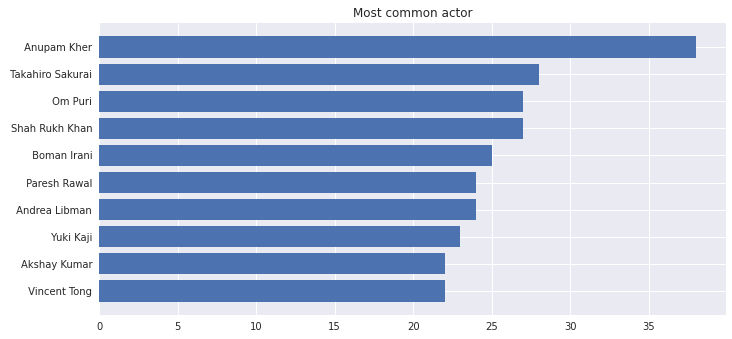

In [14]:
plt.style.use("seaborn")
plt.figure(figsize = (10,5))
plt.barh(result.index[:10],result.values[:10])
plt.title("Most common actor")
plt.show()

In [15]:
result = df['country'].value_counts()
result = result[0:10].sort_values()
result

Mexico             100
Egypt              101
France             115
Spain              134
Canada             177
South Korea        183
Japan              225
United Kingdom     396
India              923
United States     2549
Name: country, dtype: int64

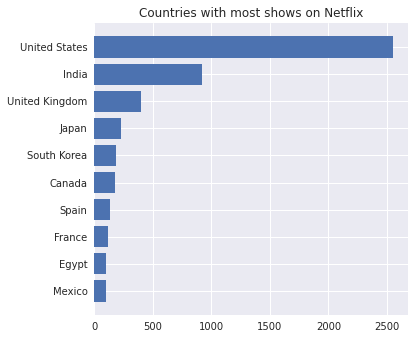

In [16]:
plt.style.use("seaborn")
plt.figure(figsize = (5,5))
plt.barh(result.index[:10],result.values[:10])
plt.title("Countries with most shows on Netflix")
plt.show()

In [17]:
result = df['rating'].value_counts().sort_values()
result

NC-17          3
UR             5
TV-Y7-FV       6
G             39
NR            83
TV-G         194
PG           247
TV-Y7        270
TV-Y         279
PG-13        386
R            665
TV-PG        804
TV-14       1928
TV-MA       2861
Name: rating, dtype: int64

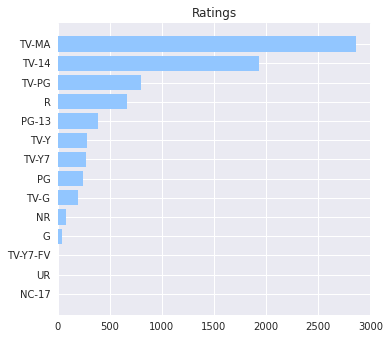

In [18]:
plt.style.use("seaborn-pastel")
plt.figure(figsize = (5,5))
plt.barh(result.index,result.values)
plt.title("Ratings")
plt.show()

In [19]:
result = df['duration'].value_counts()[0:4]
result

1 Season     1608
2 Seasons     378
3 Seasons     183
90 min        136
Name: duration, dtype: int64

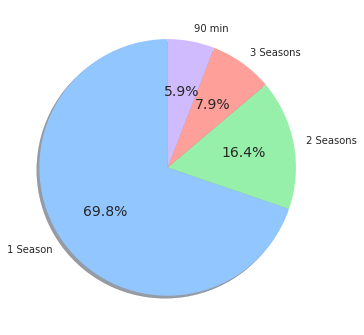

In [20]:
plt.style.use("seaborn-pastel")
plt.pie(result.values, labels = result.index, startangle = 90, autopct = '%1.1f%%', shadow=True)
plt.show()

In [21]:
result = df['listed_in'].str.split(',').explode().value_counts()[0:10].sort_values()
result

 Romantic Movies           528
 TV Dramas                 641
 Independent Movies        653
International TV Shows     689
Action & Adventure         721
 Dramas                    722
Documentaries              751
Comedies                  1074
Dramas                    1384
 International Movies     2323
Name: listed_in, dtype: int64

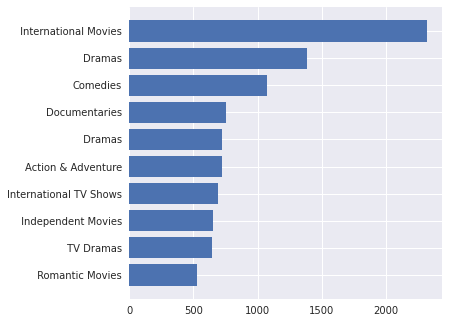

In [22]:
plt.style.use("seaborn")
plt.figure(figsize = (5,5))
plt.barh(result.index[:10],result.values[:10])
plt.show()